# Hotel Bookings - Exploratory Data Analysis

### 1. Exploration
### 2. Cleaning
### 3. Feature Engineering 

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
plt.style.use('fivethirtyeight')

In [152]:
data = pd.read_csv("hotel_bookings.csv")

In [153]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [155]:
# get overview of numeric columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [156]:
data['hotel'].value_counts()/len(data)*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

#### Checking for class imbalance: 37% - 63%

In [157]:
data['is_canceled'].value_counts()/len(data)*100  

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

#### Checking for missing values per variable.

In [158]:
data.isna().sum()/len(data)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [159]:
# drop columns with too many missing values

data.drop(['agent', 'company'], axis=1, inplace=True)

In [160]:
# transform target variable into categorical

data['is_canceled'] = pd.Categorical(data['is_canceled'])

### Distribution Channel

In [161]:
data['distribution_channel'].value_counts()/len(data)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

In [162]:
print(len(data[(data['distribution_channel'] == 'TA/TO') | (data['distribution_channel'] == 'Direct') | (data['distribution_channel'] == 'Corporate')]))
print(len(data))

119192
119390


__Only regarding the first three distribution channels only drops about 200 data points. This is equivalent to only 0.1% of the data. Therefore,  we drop the other distribution channels.__

In [163]:
data = data[(data['distribution_channel'] == 'TA/TO') |
            (data['distribution_channel'] == 'Direct') |
            (data['distribution_channel'] == 'Corporate')] 

In [164]:
data['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
Name: distribution_channel, dtype: int64

__Then drop the remaining NAs from the data:__

In [165]:
print(len(data))
print(len(data.dropna()))

119192
118704


In [166]:
data = data.dropna()

### Reserved Room Type

In [167]:
# Distribution of variable

data['reserved_room_type'].value_counts()

A    85446
D    19161
E     6470
F     2890
G     2083
B     1114
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

__We drop rooms L & P because they barely have data points recorded. We need to drop the room levels from two variables__

In [168]:
data = data[(data['reserved_room_type'] != 'P') & (data['reserved_room_type'] != 'L')]
data = data[(data['assigned_room_type'] != 'P') & (data['assigned_room_type'] != 'L')]

__Check the percentage of cancellations per room type__

In [169]:
room_cancel=data.groupby('reserved_room_type')['is_canceled'].value_counts().unstack() 

In [170]:
room_cancel=data.groupby('reserved_room_type')['is_canceled'].value_counts().unstack()
room_cancel['total']=room_cancel[0]+room_cancel[1]
room_cancel['percentage_canceled']=round(room_cancel[1]/room_cancel["total"],2)
room_cancel

is_canceled,0,1,total,percentage_canceled
reserved_room_type,,,,
A,51897,33549,85446,0.39
B,750,364,1114,0.33
C,623,308,931,0.33
D,13060,6101,19161,0.32
E,4568,1902,6470,0.29
F,2010,880,2890,0.30
G,1320,763,2083,0.37
H,356,245,601,0.41


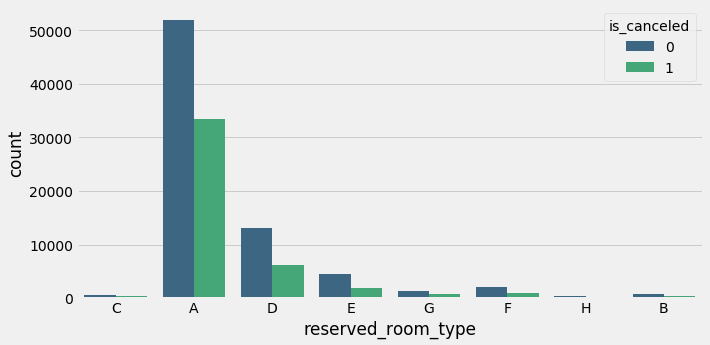

In [171]:
plt.figure(figsize=(10,5))
sns.countplot(x='reserved_room_type',hue="is_canceled",data=data,palette='viridis')

### Hotel Types

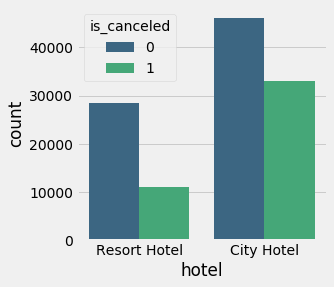

In [172]:
plt.figure(figsize=(4,4))
sns.countplot(x='hotel',hue="is_canceled",data=data,palette='viridis')

__Looks like the City Hotels have more cancellations than Resort Hotels__

In [173]:
hotel_cancel=data.groupby('hotel')['is_canceled'].value_counts().unstack()
hotel_cancel['total']=hotel_cancel[0]+hotel_cancel[1]
hotel_cancel['percentage_canceled']=round(hotel_cancel[1]/hotel_cancel["total"],2)
hotel_cancel

is_canceled,0,1,total,percentage_canceled
hotel,,,,
City Hotel,46070,33037,79107,0.42
Resort Hotel,28514,11075,39589,0.28


### Lead Time

Shows the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

count    118696.000000
mean        104.454405
std         106.931580
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

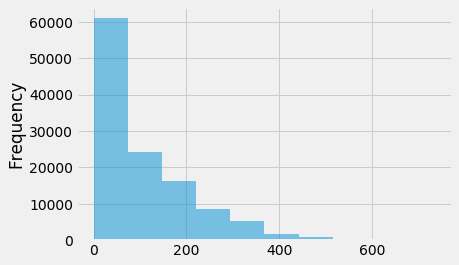

In [174]:
# strong positive skew

data["lead_time"].plot.hist(alpha=0.5,bins=10)
data["lead_time"].describe()

__Due to this extreme skewed distribution we create 2 binary variables:__

- Having a big lead time -> booking far in advance -> lead time >= 160 days
- Having a small lead time -> recent booking -> lead time <= 14 days

In [175]:
data['far_in_advance'] = pd.Categorical(np.where(data['lead_time'] >= 160, 1, 0))
data['recent_booking'] = pd.Categorical(np.where(data['lead_time'] <= 14, 1, 0))
data = data.drop('lead_time', axis=1) # drop initial column

### Arrival dates

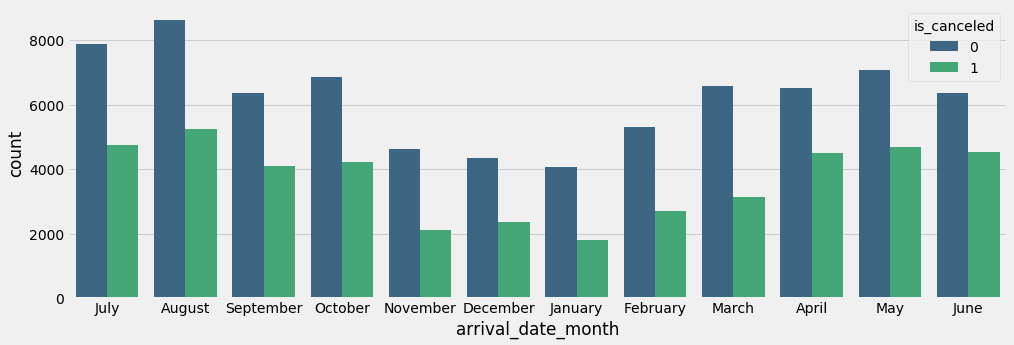

In [176]:
plt.figure(figsize=(15,5))
sns.countplot(x='arrival_date_month',data=data,hue='is_canceled',palette='viridis')

We see that bookings some months have higher cancellation rates: April, May, June (so just before the peak season). We also see much higher volume of bookings for the summer months compared to winter time.

### Length of stay: in week and weekend nights

0     51565
2     33227
1     30463
4      1848
3      1253
6       152
5        78
8        60
7        19
9        11
10        7
12        5
16        3
13        3
14        2
Name: stays_in_weekend_nights, dtype: int64

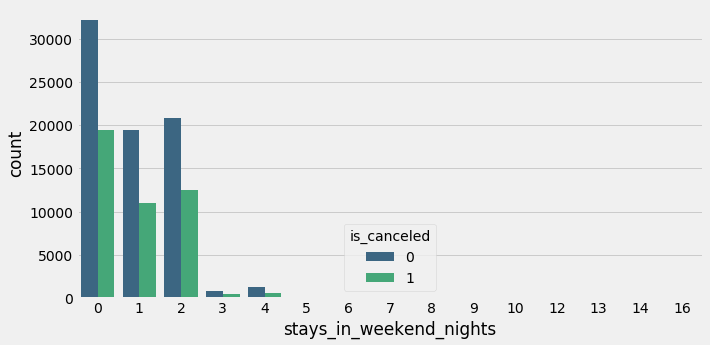

In [177]:
display(data["stays_in_weekend_nights"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='stays_in_weekend_nights',data=data,hue='is_canceled',palette='viridis')

2     33530
1     29990
3     22186
5     11051
4      9552
0      7557
6      1491
10     1029
7      1027
8       654
9       231
15       84
11       55
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
26        1
32        1
33        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

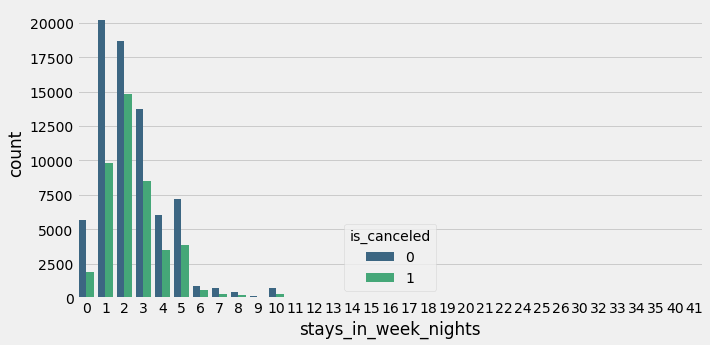

In [178]:
display(data["stays_in_week_nights"].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='stays_in_week_nights',data=data,hue='is_canceled',palette='viridis')

For these variables we clean the data to look at bookings of maximum one full week. The longer bookings could come from the Resort Hotel category, but they represent only 0.027% of the data. 

Cut outliers :

In [179]:
data = data[data.stays_in_week_nights <= 5]
data = data[data.stays_in_weekend_nights <= 2]

### Adults

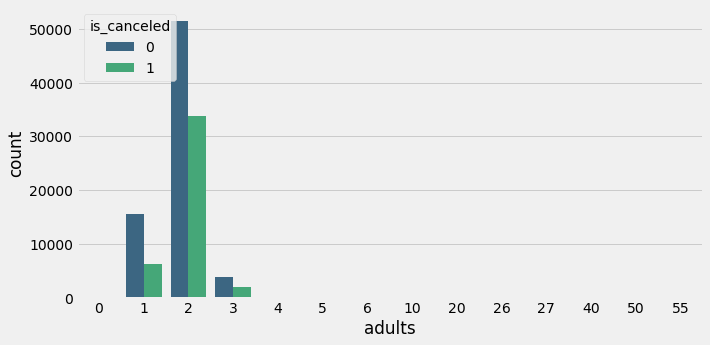

In [180]:
plt.figure(figsize = (10,5))
sns.countplot(x='adults',data=data,hue='is_canceled',palette='viridis')

__Drop outliers__

In [181]:
data = data[data.adults <= 3]

### Repeated Guests

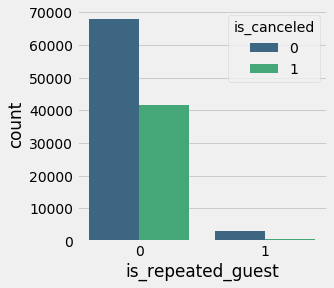

In [182]:
plt.figure(figsize = (4,4))
sns.countplot(x='is_repeated_guest',data=data,hue='is_canceled',palette='viridis')

In [183]:
data['is_repeated_guest'].value_counts()/len(data)*100

0    96.725316
1     3.274684
Name: is_repeated_guest, dtype: float64

There are barely any repeated guests in the dataset (only 3%). This means, this variable will not be a good predictor to classify canellations and can be dropped.

In [184]:
data = data.drop('is_repeated_guest', axis=1)

### Booking changes

How often a guest changed his/her booking options.

In [185]:
data["booking_changes"].describe() 

count    113385.000000
mean          0.213282
std           0.625258
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          18.000000
Name: booking_changes, dtype: float64

It can be seen that the majority of guests rarely change booking details.

In [186]:
pd.Categorical(data['booking_changes']).value_counts()

0     96604
1     11879
2      3492
3       859
4       342
5        99
6        45
7        26
8        13
9         5
10        5
11        1
12        1
13        4
14        3
15        3
16        2
17        1
18        1
dtype: int64

__Creating a binary variable for booking changes__

In [187]:
data['changed_booking'] = pd.Series([0 if x == 0 else 1 for x in data['booking_changes']])

# make it categorical
data['changed_booking'] = pd.Categorical(data['changed_booking'])

### Children and babies

In [188]:
data["children"].value_counts()

0.0    105335
1.0      4575
2.0      3401
3.0        74
Name: children, dtype: int64

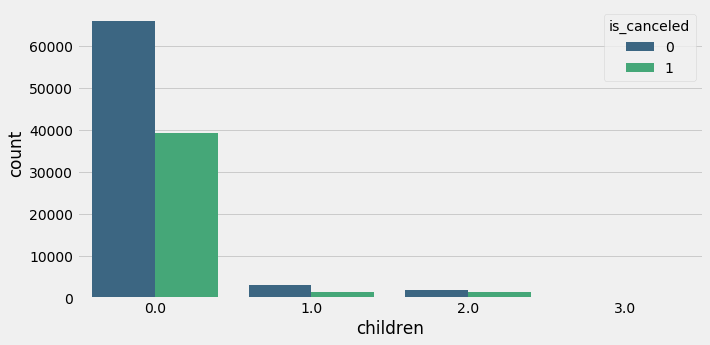

In [189]:
plt.figure(figsize = (10,5))
sns.countplot(x='children',data=data,hue='is_canceled',palette='viridis')

The number of children seem to lead to a slightly different percentage of cancellations. We tried grouping this variable but we obtained a balanced percentage, therefore we just clean the outliers.

In [190]:
data = data[data.children <= 2]

In [191]:
data["babies"].value_counts() 

0     112457
1        841
2         11
10         1
9          1
Name: babies, dtype: int64

In [192]:
data = data[data.babies <= 1]

### Customer Type

In [193]:
data["customer_type"].value_counts()

Transient          84946
Transient-Party    24485
Contract            3337
Group                530
Name: customer_type, dtype: int64

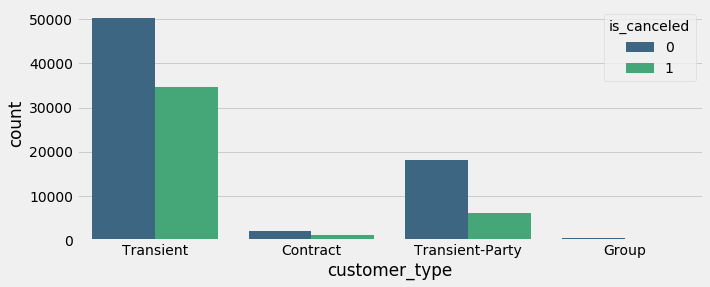

In [194]:
plt.figure(figsize = (10,4))
sns.countplot(x='customer_type',data=data,hue='is_canceled',palette='viridis')

We see that the Transient-Party category has a lower cancellation rate than Transient. 

### Deposit Type

In [195]:
data["deposit_type"].value_counts()

No Deposit    98644
Non Refund    14499
Refundable      155
Name: deposit_type, dtype: int64

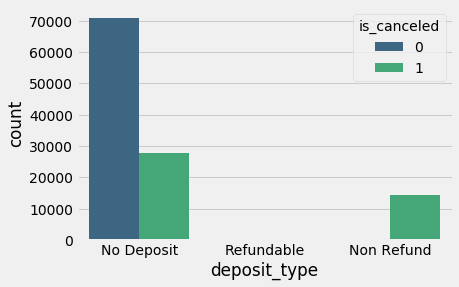

In [196]:
plt.figure(figsize = (6,4))
sns.countplot(x='deposit_type',data=data,hue='is_canceled',palette='viridis')

In [197]:
data[data["deposit_type"]=="Non Refund"]["is_canceled"].value_counts()

1    14407
0       92
Name: is_canceled, dtype: int64

This variable shows surprising results: __it seems that for the non-refundable bookings, virtually everyone cancelled.__ We also clean the 'Refundable' category because there is almost no data and this might influence the model just because of the sample distribution.

In [198]:
data = data[data.deposit_type != 'Refundable']

### Meal

In [199]:
data["meal"].value_counts()

BB           87880
HB           13104
SC           10317
Undefined     1085
FB             757
Name: meal, dtype: int64

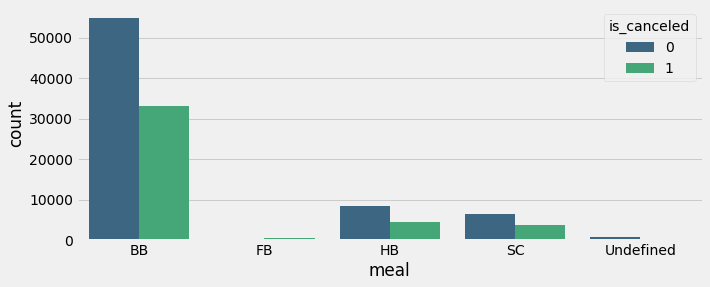

In [200]:
plt.figure(figsize=(10,4))
sns.countplot(x='meal',data=data,hue='is_canceled',palette='viridis')

### Previous Cancellations

In [201]:
data["previous_cancellations"].value_counts()

0     106821
1       5902
2        108
3         62
24        48
11        35
4         30
26        26
25        25
6         22
19        19
5         18
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

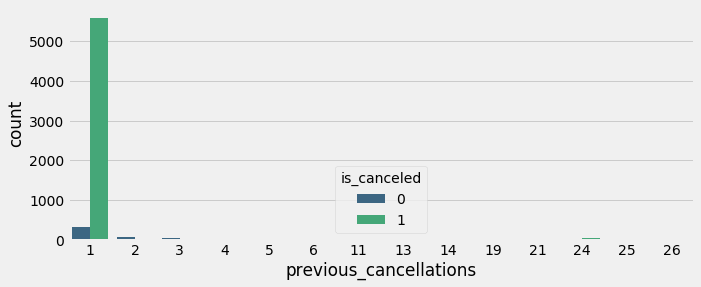

In [202]:
plt.figure(figsize=(10,4))
sns.countplot(x='previous_cancellations',
              data=data[data["previous_cancellations"]>=1],
              hue='is_canceled',
              palette='viridis')

Here we see a trend showing that almost everyone who canceled al least once is almost guaranteed to cancel. We will make this variable binary: cancelled before or not

In [203]:
data['previous_cancel'] = pd.Series([0 if x == 0 else 1 for x in data['previous_cancellations']]) # binary for previous_cancelations
data['previous_cancel'] = pd.Categorical(data['previous_cancel'])

### Room type reserved/assigned

In [204]:
sum(data["reserved_room_type"]==data["assigned_room_type"])

98885

In [205]:
sum(data["reserved_room_type"]!=data["assigned_room_type"])

14258

In [206]:
data[data["reserved_room_type"]!=data["assigned_room_type"]]["is_canceled"].value_counts()

0    13498
1      760
Name: is_canceled, dtype: int64

The guests who are assigned a different room type don't cancel - maybe they got a room upgrade for free. We will make a new binary variable that checks if the guest is assigned a different room type than the one booked.

In [207]:
# same room type assigned

bol = data['assigned_room_type'] == data['reserved_room_type']
data['right_room'] = bol.astype(int)
data['right_room'] = pd.Categorical(data['right_room'])

### Adr

In [208]:
data["adr"].describe()

count    113143.000000
mean        101.736633
std          50.068754
min           0.000000
25%          70.000000
50%          95.000000
75%         125.560000
max        5400.000000
Name: adr, dtype: float64

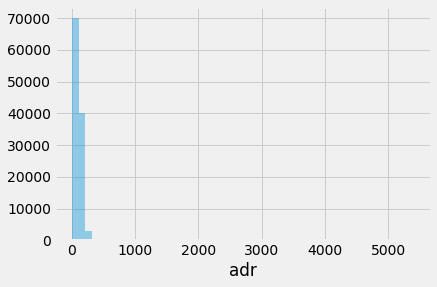

In [209]:
sns.distplot(data["adr"], kde = False)

We clean the outliers from this column. We see a few points for which the adr (room rate) is 0 - as we don't have extra information about this, we decide to keep them as this could be special promotions or employees who can book for free.

In [210]:
data = data[data.adr >=0 ]
data = data[data.adr <= 300]

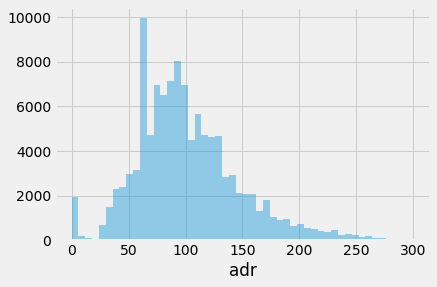

In [211]:
sns.distplot(data["adr"], kde = False)

### Special requests

In [212]:
data["total_of_special_requests"].value_counts()

0    66823
1    31252
2    12158
3     2323
4      302
5       33
Name: total_of_special_requests, dtype: int64

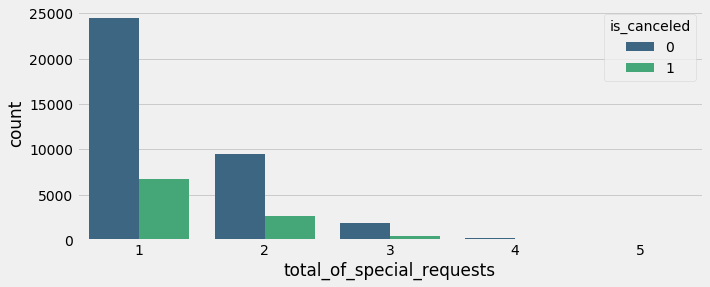

In [213]:
plt.figure(figsize = (10,4))
sns.countplot(x='total_of_special_requests',
              data=data[data["total_of_special_requests"]>=1],hue='is_canceled',palette='viridis')


We see that any special requests significantly decreases the cancellation rate - this can show that the guests really made an effort to contact the hotel and their intention to stay. 

We will make a new binary variable that checks if there are any special requests for a booking:

In [214]:
data['special_requests'] = pd.Series([0 if x == 0 else 1 for x in data['total_of_special_requests']]) 
# binary for special requests
data['special_requests'] = pd.Categorical(data['special_requests'])


### Reservation status

In [215]:
data["reservation_status"].value_counts()

Check-Out    70812
Canceled     40993
No-Show       1086
Name: reservation_status, dtype: int64

We will drop this variable as it is the same as the dependent variable 'is_canceled', which groups the 'canceled' and 'no-show' categories.

In [216]:
data["is_canceled"].value_counts()

0    70812
1    42079
Name: is_canceled, dtype: int64

### Required car parking

In [217]:
data["required_car_parking_spaces"].value_counts()

0    105984
1      6880
2        23
8         2
3         2
Name: required_car_parking_spaces, dtype: int64

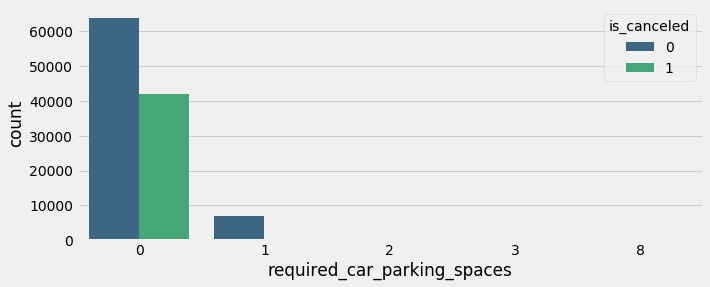

In [220]:
plt.figure(figsize = (10,4))
sns.countplot(x='required_car_parking_spaces',
              data=data,hue='is_canceled',palette='viridis')

We will also transform this variable to binary: parking space requested or not.

In [221]:
data['required_car_parking_spaces'] = pd.Series([0 if x == 0 else 1 for x in data['required_car_parking_spaces']]) 
# binary for parking spots
data['required_car_parking_spaces'] = pd.Categorical(data['required_car_parking_spaces'])


### This concludes the exploratory analysis! The next steps to fit models on the transformed data can be followed in the next notebook - Predictive Models.